## CNN을 적용한 패션 MNIST 데이터셋에 대한 분류

In [22]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

### 패션 MNIST 데이터 불러오기

In [23]:
(train_input, train_target), (test_input, test_target ) = \
    keras.datasets.fashion_mnist.load_data()

In [24]:
train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size = 0.2, random_state = 42
)

In [25]:
train_scaled.shape

(48000, 28, 28, 1)

In [26]:
train_target.shape

(48000,)

In [27]:
model = keras.Sequential()

# 합성곱층을 통하여 이미지에 특성 정보를 확보
# 첫 번째 합성곱 층
# 32개의 neuran(filter)
# kernel_size=3 : kerner(fillter)3 x 3
# activation = 'relu' 활성화 함수
# padding = 'same' : 패딩을 적용하는데 패딩의 내용은 0으로 채우겠다.
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu',\
          padding='same', input_shape=(28,28,1)))
# 첫 번째 풀링 층
# 2 : kernel 크기 2x2
model.add(keras.layers.MaxPooling2D(2))

# 두 번째 합성곱 층
model.add(keras.layers.Conv2D(64, kernel_size=3, activation='relu', padding='same'))

# 두 번째 풀링 층
model.add(keras.layers.MaxPooling2D(2))

# 1차원 형태로 데이터를 펼친다.
model.add(keras.layers.Flatten())

# DNN(심층 신경망)- 전결합층(Fully-connected)
model.add(keras.layers.Dense(100, activation='relu'))
# 과적합을 방지하기 위해서 학습을 수행할 때 은닉층의 뉴런중 일부는 사용하지 않게 할 때 사용
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation='softmax'))

In [28]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 100)               313700    
_________________________________________________________________
dropout_3 (Dropout)          (None, 100)              

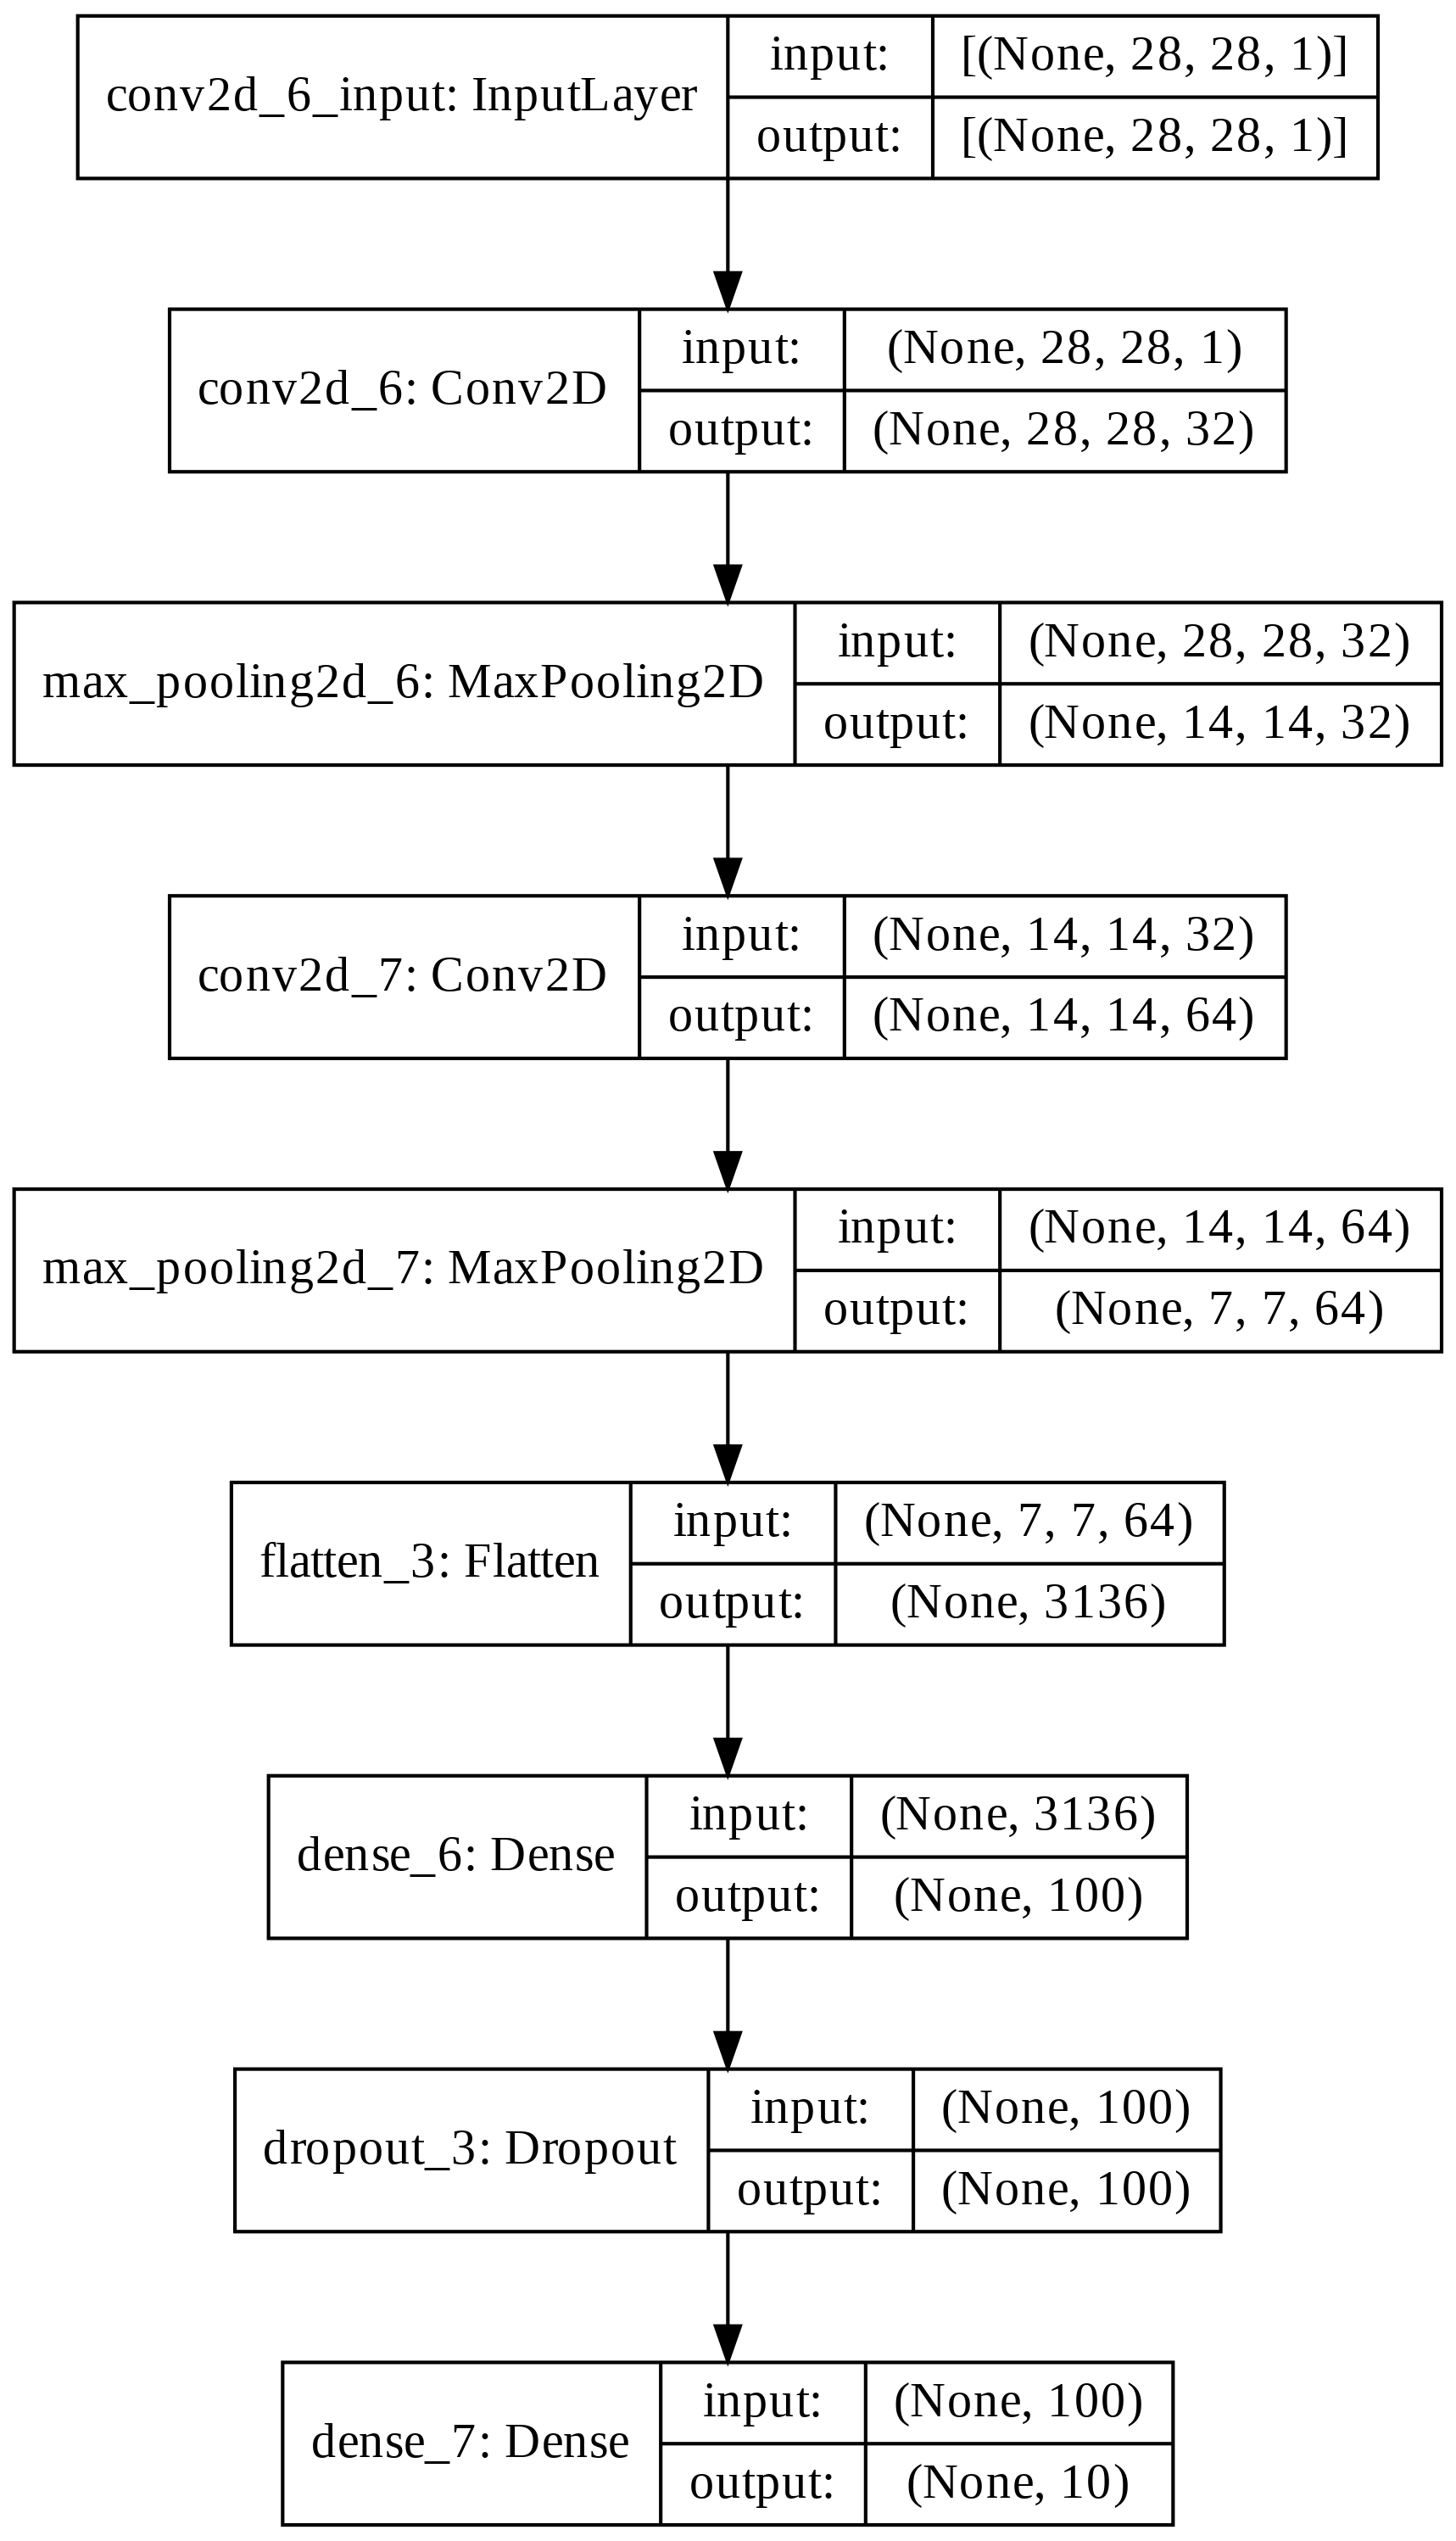

In [29]:
keras.utils.plot_model(model, show_shapes=True,
                       to_file='cnn-architecture.png', dpi=300)

## 모델 컴파일과 훈련

In [34]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
checkpoint_cb=keras.callbacks.ModelCheckpoint('best-cnn-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 2,
                                                  restore_best_weights=True)
history=model.fit(train_scaled, train_target, epochs=20,
                  validation_data = (val_scaled, val_target),
                  callbacks=[checkpoint_cb, early_stopping_cb])


Epoch 1/20
1500/1500 [==============================] - 64s 42ms/step - loss: 0.5136 - accuracy: 0.8162 - val_loss: 0.3259 - val_accuracy: 0.8783
Epoch 2/20
1500/1500 [==============================] - 62s 41ms/step - loss: 0.3373 - accuracy: 0.8781 - val_loss: 0.2683 - val_accuracy: 0.9007
Epoch 3/20
1500/1500 [==============================] - 62s 41ms/step - loss: 0.2886 - accuracy: 0.8964 - val_loss: 0.2555 - val_accuracy: 0.9054
Epoch 4/20
1500/1500 [==============================] - 62s 41ms/step - loss: 0.2585 - accuracy: 0.9070 - val_loss: 0.2325 - val_accuracy: 0.9134
Epoch 5/20
1500/1500 [==============================] - 62s 41ms/step - loss: 0.2304 - accuracy: 0.9146 - val_loss: 0.2229 - val_accuracy: 0.9171
Epoch 6/20
1500/1500 [==============================] - 63s 42ms/step - loss: 0.2129 - accuracy: 0.9209 - val_loss: 0.2161 - val_accuracy: 0.9212
Epoch 7/20
1500/1500 [==============================] - 63s 42ms/step - loss: 0.1947 - accuracy: 0.9287 - val_loss: 0.2275 -

### 평가

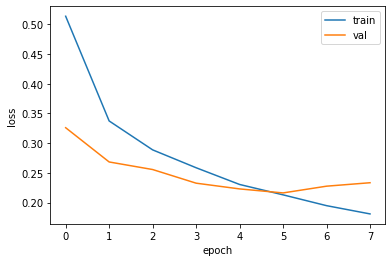

In [43]:
import matplotlib.pyplot as plt

plt.plot( history.history[ 'loss' ] )
plt.plot( history.history[ 'val_loss' ] )
plt.xlabel( 'epoch' )
plt.ylabel( 'loss' )
plt.legend( [ 'train', 'val' ] )

plt.show()

In [35]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 4s 11ms/step - loss: 0.2161 - accuracy: 0.9212


[0.21613159775733948, 0.9212499856948853]

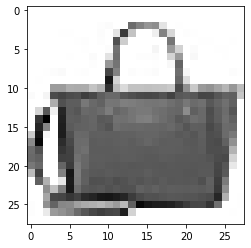

In [44]:
plt.imshow( val_scaled[ 0 ].reshape( 28, 28 ), cmap = 'gray_r' )
plt.show()

### 예측

In [36]:
preds = model.predict(val_scaled[0:1])
print(preds)

[[1.4924580e-16 6.2811635e-22 2.1067263e-17 4.8130318e-15 6.4953373e-18
  1.2632647e-12 3.6883777e-16 3.8460175e-15 1.0000000e+00 1.3305571e-17]]


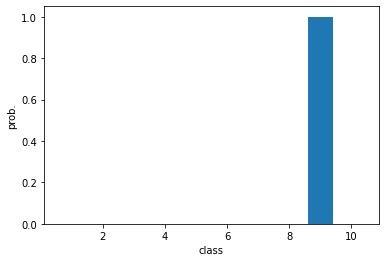

In [40]:
plt.bar(range(1,11), preds[0])
plt.xlabel('class')
plt.ylabel('prob.')
plt.show()

In [45]:
classs = ['티셔츠', '바지', '스웨터', '드레스','코트', '샌달', '셔츠'
        '스니커즈', '가방', '앵클 부츠']

import numpy as np

print(classs[np.argmax(preds)])

앵클 부츠


In [46]:
test_scaled = test_input.reshape( -1, 28, 28, 1 ) / 255.0

model.evaluate( test_scaled, test_target )

313/313 [==============================] - 4s 12ms/step - loss: 0.2341 - accuracy: 0.9148


[0.23409059643745422, 0.9147999882698059]